In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

sys.path.append('../../')
import experiments

curves = 9
curve_labels = ['k=0.25 1/4x','k=0.25 1x', 'k=0.25 4x', 'k=1 1/4x', 'k=1 1x', 'k=1 4x',  
                'k=4 1/4x','k=4 1x', 'k=4 4x',]
curve_colors = ['lightblue', 'blue', 'darkblue', 'lightgreen', 'limegreen', 'darkgreen', 'peachpuff', 'orange', 'darkorange']
curve_styles = ['-', '-', '-', '-', '-', '-', '-', '-', '-']
layers = 4
layer_labels = [1, 2, 3, 4]
crosses = 3

results = np.zeros((curves, layers, 3))
results_test = np.zeros((curves, layers, 3))
# both are indexed [network][layer][avg/lowererr/uppererr]
# we have to make sure to not be sketchy and state that these are averages within a net instead of between nets

included_nets = [217, 219, 223, 225, 229, 231, 234, 236, 238]

for ID in included_nets:

    print('Processing ID:', ID)
    opt = experiments.opt[ID]

    curve_idx = 0
    if opt.hyper.lr_bs_factor == 1:
        curve_idx += 3
    if opt.hyper.lr_bs_factor == 4:
        curve_idx += 6
    if opt.dnn.neuron_multiplier[0] == 1:
        curve_idx += 1
    elif opt.dnn.neuron_multiplier[0] == 4:
        curve_idx += 2

    csv_file = experiments.opt[ID].csv_dir + experiments.opt[ID].name + '_redundancy.csv'
    df = pd.read_csv(csv_file)

    nonselective = np.array([[df[df['cross_validation'] == i][df['evaluation_set'] == 'train'][df['layer'] == str(j)]
                              ['not_selective'].iloc[0] for j in range(layers)] for i in range(crosses)])
    nonselective_test = np.array(
        [[df[df['cross_validation'] == i][df['evaluation_set'] == 'test'][df['layer'] == str(j)]
          ['not_selective'].iloc[0] for j in range(layers)] for i in range(crosses)])

    results[curve_idx, :, 0] = np.mean(nonselective, axis=0)
    results[curve_idx, :, 1] = results[curve_idx, :, 0] - np.min(nonselective, axis=0)
    results[curve_idx, :, 2] = np.max(nonselective, axis=0) - results[curve_idx, :, 0]
    results_test[curve_idx, :, 0] = np.mean(nonselective_test, axis=0)
    results_test[curve_idx, :, 1] = results_test[curve_idx, :, 0] - np.min(nonselective_test, axis=0)
    results_test[curve_idx, :, 2] = np.max(nonselective_test, axis=0) - results_test[curve_idx, :, 0]

results *= 100
results_test *= 100

Processing ID: 217
Processing ID: 219
Processing ID: 223
Processing ID: 225
Processing ID: 229
Processing ID: 231
Processing ID: 234
Processing ID: 236
Processing ID: 238


/cm/shared/openmind/anaconda/2.5.0/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


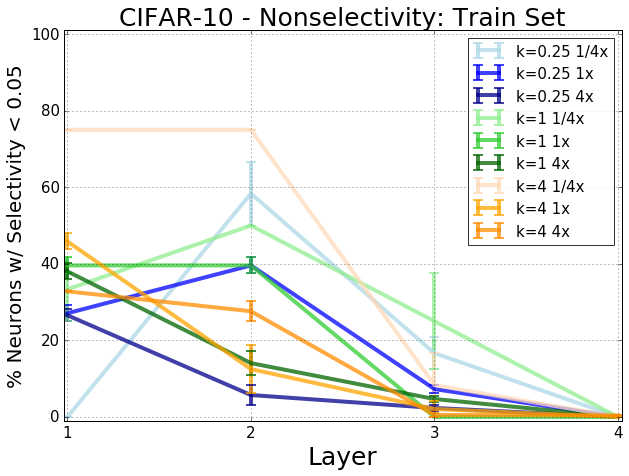

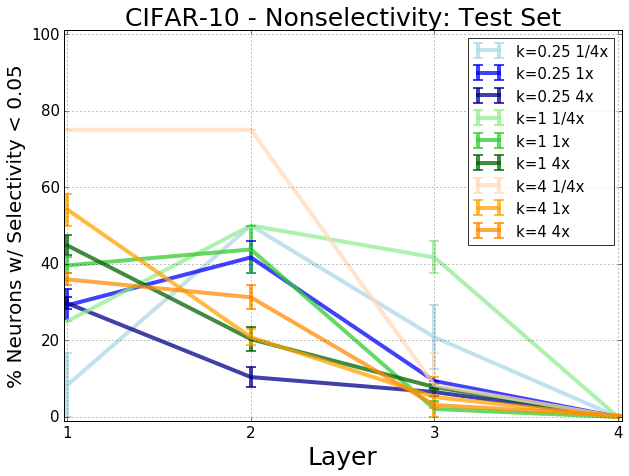

In [2]:
# first plot train curves

% matplotlib inline
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Nonselectivity: Train Set', fontsize=25)
plt.xlabel('Layer', fontsize=25)
plt.ylabel('% Neurons w/ Selectivity < 0.05', fontsize=20)
plt.xlim((0.98, layers+0.02))
plt.ylim((-1, 101))
plt.grid(True, which='both', c='black')
plt.xticks(layer_labels, fontsize=15)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=15)

for curve_idx in range(curves):
    plt.errorbar(layer_labels, results[curve_idx, :, 0], yerr=results[curve_idx, :, 1],
                 color=curve_colors[curve_idx], linestyle=curve_styles[curve_idx], 
                 capsize=5, capthick=2, linewidth=4, alpha=0.75)
plt.legend(curve_labels, loc='upper right', framealpha=0.8, fontsize=15)

plt.show()

# second plot test curves

plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Nonselectivity: Test Set', fontsize=25)
plt.xlabel('Layer', fontsize=25)
plt.ylabel('% Neurons w/ Selectivity < 0.05', fontsize=20)
plt.xlim((0.98, layers+0.02))
plt.ylim((-1, 101))
plt.grid(True, which='both', c='black')
plt.xticks(layer_labels, fontsize=15)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=15)

for curve_idx in range(curves):
    plt.errorbar(layer_labels, results_test[curve_idx, :, 0], yerr=results_test[curve_idx, :, 1],
                 color=curve_colors[curve_idx], linestyle=curve_styles[curve_idx], 
                 capsize=5, capthick=2, linewidth=4, alpha=0.75)
plt.legend(curve_labels, loc='upper right', framealpha=0.8, fontsize=15)

plt.show()

In [3]:
print(results)

[[[  0.           0.           0.        ]
  [ 58.33333333   8.33333333  16.66666667]
  [ 16.66666667   4.16666667   8.33333333]
  [  0.           0.           0.        ]]

 [[ 27.08333333   2.08333333   4.16666667]
  [ 39.58333333   2.08333333   4.16666667]
  [  7.29166667   1.04166667   2.08333333]
  [  0.           0.           0.        ]]

 [[ 26.5625       1.5625       3.125     ]
  [  5.72916667   2.60416667   3.64583333]
  [  2.34375      0.78125      0.78125   ]
  [  0.           0.           0.        ]]

 [[ 33.33333333   8.33333333  16.66666667]
  [ 50.           0.           0.        ]
  [ 25.          12.5         12.5       ]
  [  0.           0.           0.        ]]

 [[ 39.58333333   2.08333333   4.16666667]
  [ 39.58333333   2.08333333   4.16666667]
  [  0.           0.           0.        ]
  [  0.           0.           0.        ]]

 [[ 38.02083333   2.08333333   2.60416667]
  [ 14.0625       3.125        1.5625    ]
  [  4.6875       0.78125      0.78125   ]
 